In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=2, suppress=True)

In [2]:
houses = np.loadtxt("houses.csv", delimiter=",", skiprows=1)
x_train = houses[:, :4]
y_train = houses[:, 4]
print(x_train.shape)
print(y_train.shape)

(100, 4)
(100,)


In [3]:
standard_scaler = StandardScaler()
x_norm = standard_scaler.fit_transform(x_train)
print(np.ptp(x_train, axis=0))
print(np.ptp(x_norm, axis=0))

[2406.    4.    1.   95.]
[5.84 6.13 2.06 3.68]


In [4]:
sgdr = SGDRegressor()  # Stochastic Gradient Descent Regressor
sgdr.fit(x_norm, y_train)
print(sgdr.coef_)
print(sgdr.intercept_)

[110.46 -21.39 -32.55 -37.81]
[362.26]


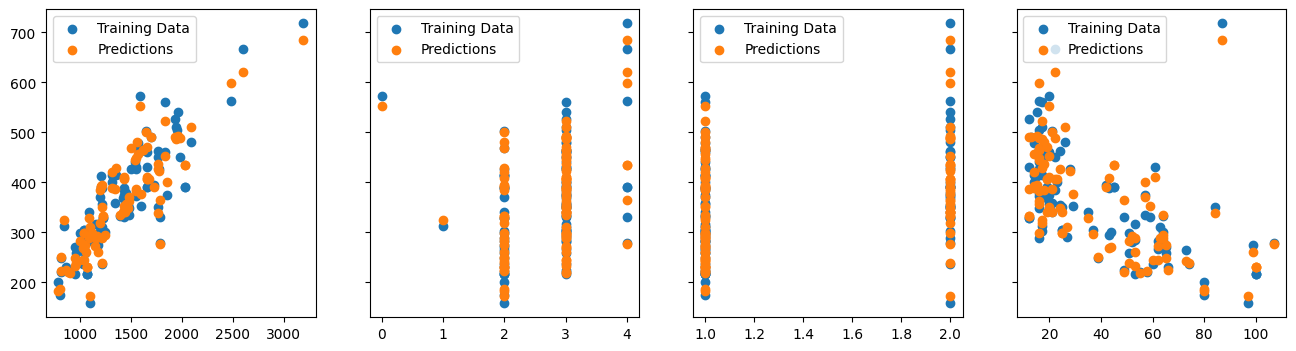

In [5]:
predictions = sgdr.predict(x_norm)
fig, ax = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:, i], y_train, label="Training Data")
    ax[i].scatter(x_train[:, i], predictions, label="Predictions")
    ax[i].legend()
plt.show()